Video

In [1]:
import pandas as pd

In [2]:
url = 'https://www.imdb.com/chart/top/'

In [3]:
top250 = pd.read_html(url)

In [4]:
#top250.head()

In [5]:
top250

[     Unnamed: 0                                       Rank & Title  \
 0           NaN               1.  The Shawshank Redemption  (1994)   
 1           NaN                          2.  The Godfather  (1972)   
 2           NaN                 3.  The Godfather: Part II  (1974)   
 3           NaN                        4.  The Dark Knight  (2008)   
 4           NaN                           5.  12 Angry Men  (1957)   
 5           NaN                       6.  Schindler's List  (1993)   
 6           NaN  7.  The Lord of the Rings: The Return of the K...   
 7           NaN                           8.  Pulp Fiction  (1994)   
 8           NaN        9.  Il buono, il brutto, il cattivo  (1966)   
 9           NaN  10.  The Lord of the Rings: The Fellowship of ...   
 10          NaN                            11.  Fight Club  (1999)   
 11          NaN                          12.  Forrest Gump  (1994)   
 12          NaN                             13.  Inception  (2010)   
 13   

In [6]:
df = top250[0]

In [7]:
df.head()

,Unnamed: 0,Rank & Title,IMDb Rating,Your Rating,Unnamed: 4
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910 NOT YET RELEASED Seen,NaN
1,NaN,2. The Godfather (1972),9.1,12345678910 NOT YET RELEASED Seen,NaN
2,NaN,3. The Godfather: Part II (1974),9.0,12345678910 NOT YET RELEASED Seen,NaN
3,NaN,4. The Dark Knight (2008),9.0,12345678910 NOT YET RELEASED Seen,NaN
4,NaN,5. 12 Angry Men (1957),8.9,12345678910 NOT YET RELEASED Seen,NaN


In [8]:
df.describe(include = 'all')

,Unnamed: 0,Rank & Title,IMDb Rating,Your Rating,Unnamed: 4
count,0.0,250,250.000000,250,0.0
unique,NaN,250,NaN,1,NaN
top,NaN,93. Capharnaüm (2018),NaN,12345678910 NOT YET RELEASED Seen,NaN
freq,NaN,1,NaN,250,NaN
mean,NaN,NaN,8.256400,NaN,NaN
std,NaN,NaN,0.230023,NaN,NaN
min,NaN,NaN,8.000000,NaN,NaN
25%,NaN,NaN,8.100000,NaN,NaN
50%,NaN,NaN,8.200000,NaN,NaN
75%,NaN,NaN,8.400000,NaN,NaN


In [9]:
df = df.drop(columns = ['Unnamed: 0', 'Your Rating', 'Unnamed: 4'])

df.head()

,Rank & Title,IMDb Rating
0,1. The Shawshank Redemption (1994),9.2
1,2. The Godfather (1972),9.1
2,3. The Godfather: Part II (1974),9.0
3,4. The Dark Knight (2008),9.0
4,5. 12 Angry Men (1957),8.9


In [10]:
s1 = df['Rank & Title'].str.split(pat = '.', n = 1, expand = True)

In [11]:
s1.head()

,0,1
0,1,The Shawshank Redemption (1994)
1,2,The Godfather (1972)
2,3,The Godfather: Part II (1974)
3,4,The Dark Knight (2008)
4,5,12 Angry Men (1957)


In [12]:
df['Rank'] = s1[0]

df.head()

,Rank & Title,IMDb Rating,Rank
0,1. The Shawshank Redemption (1994),9.2,1
1,2. The Godfather (1972),9.1,2
2,3. The Godfather: Part II (1974),9.0,3
3,4. The Dark Knight (2008),9.0,4
4,5. 12 Angry Men (1957),8.9,5


In [13]:
df['Title'] =s1[1]

df.head()

,Rank & Title,IMDb Rating,Rank,Title
0,1. The Shawshank Redemption (1994),9.2,1,The Shawshank Redemption (1994)
1,2. The Godfather (1972),9.1,2,The Godfather (1972)
2,3. The Godfather: Part II (1974),9.0,3,The Godfather: Part II (1974)
3,4. The Dark Knight (2008),9.0,4,The Dark Knight (2008)
4,5. 12 Angry Men (1957),8.9,5,12 Angry Men (1957)


In [14]:
df = df.drop(columns = ['Rank & Title'])

df.head()

,IMDb Rating,Rank,Title
0,9.2,1,The Shawshank Redemption (1994)
1,9.1,2,The Godfather (1972)
2,9.0,3,The Godfather: Part II (1974)
3,9.0,4,The Dark Knight (2008)
4,8.9,5,12 Angry Men (1957)


In [15]:
s2 = df['Title'].str.split(pat = '(', n = 1, expand = True)

s2.head()

,0,1
0,The Shawshank Redemption,1994)
1,The Godfather,1972)
2,The Godfather: Part II,1974)
3,The Dark Knight,2008)
4,12 Angry Men,1957)


In [16]:
df['Title'] = s2[0]

df['Year'] = s2[1]

df.head()

,IMDb Rating,Rank,Title,Year
0,9.2,1,The Shawshank Redemption,1994)
1,9.1,2,The Godfather,1972)
2,9.0,3,The Godfather: Part II,1974)
3,9.0,4,The Dark Knight,2008)
4,8.9,5,12 Angry Men,1957)


In [17]:
s3 = df['Year'].str.split(pat = ')', n = 1, expand = True)

s3.head()

,0,1
0,1994,
1,1972,
2,1974,
3,2008,
4,1957,


In [18]:
df['Year'] = s3[0]

df.head()

,IMDb Rating,Rank,Title,Year
0,9.2,1,The Shawshank Redemption,1994
1,9.1,2,The Godfather,1972
2,9.0,3,The Godfather: Part II,1974
3,9.0,4,The Dark Knight,2008
4,8.9,5,12 Angry Men,1957


Video 4

In [19]:
df['Decade'] = df['Year']

df.head()

,IMDb Rating,Rank,Title,Year,Decade
0,9.2,1,The Shawshank Redemption,1994,1994
1,9.1,2,The Godfather,1972,1972
2,9.0,3,The Godfather: Part II,1974,1974
3,9.0,4,The Dark Knight,2008,2008
4,8.9,5,12 Angry Men,1957,1957


In [20]:
df['Decade'] = df['Decade'].map(lambda x: x[0:3])

df.head()

,IMDb Rating,Rank,Title,Year,Decade
0,9.2,1,The Shawshank Redemption,1994,199
1,9.1,2,The Godfather,1972,197
2,9.0,3,The Godfather: Part II,1974,197
3,9.0,4,The Dark Knight,2008,200
4,8.9,5,12 Angry Men,1957,195


In [21]:
df['Decade'] = df['Decade'] + '0s'

In [22]:
df['Decade'].describe()

count       250
unique       10
top       2010s
freq         49
Name: Decade, dtype: object

In [23]:
df.head()

,IMDb Rating,Rank,Title,Year,Decade
0,9.2,1,The Shawshank Redemption,1994,1990s
1,9.1,2,The Godfather,1972,1970s
2,9.0,3,The Godfather: Part II,1974,1970s
3,9.0,4,The Dark Knight,2008,2000s
4,8.9,5,12 Angry Men,1957,1950s


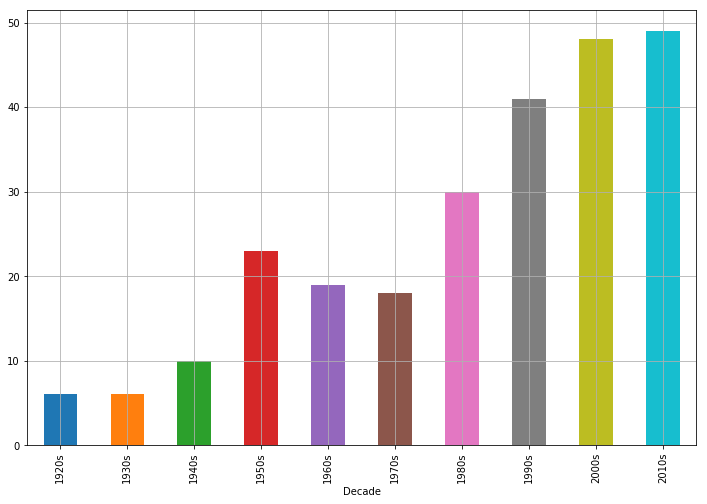

In [35]:
df['Rank'].groupby(df['Decade']).count().plot.bar(figsize = (12, 8), grid = True)

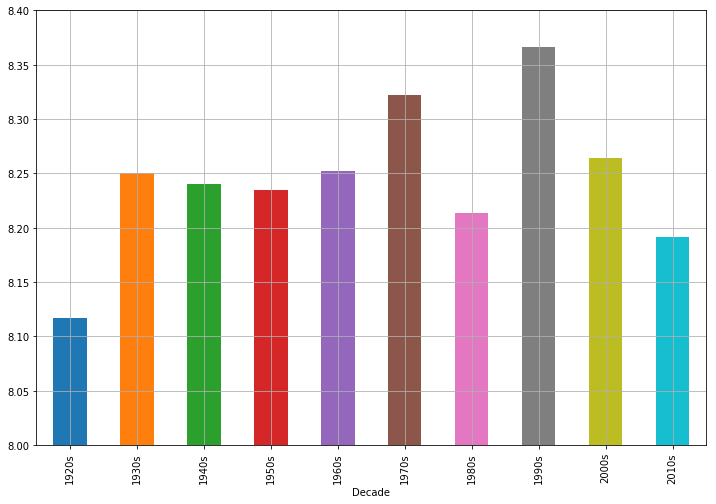

In [25]:
df['IMDb Rating'].groupby(df['Decade']).mean().plot.bar(figsize = (12, 8), grid = True, ylim = (8, 8.4))

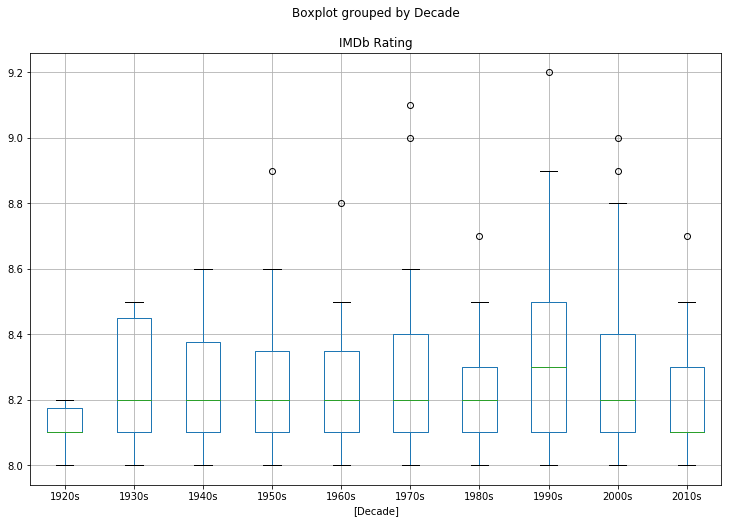

In [26]:
df.boxplot(column = ['IMDb Rating'], 
           by = ['Decade'], figsize = (12, 8), grid = True)

In [27]:
df.head(15)

,IMDb Rating,Rank,Title,Year,Decade
0,9.2,1,The Shawshank Redemption,1994,1990s
1,9.1,2,The Godfather,1972,1970s
2,9.0,3,The Godfather: Part II,1974,1970s
3,9.0,4,The Dark Knight,2008,2000s
4,8.9,5,12 Angry Men,1957,1950s
5,8.9,6,Schindler's List,1993,1990s
6,8.9,7,The Lord of the Rings: The Return of the King,2003,2000s
7,8.8,8,Pulp Fiction,1994,1990s
8,8.8,9,"Il buono, il brutto, il cattivo",1966,1960s
9,8.8,10,The Lord of the Rings: The Fellowship of the...,2001,2000s


In [28]:
import numpy as np

In [29]:
df.iat[4, 0] = np.nan

In [30]:
df.iat[8, 0] = np.nan

In [31]:
df.iat[1, 0] = np.nan
df.iat[2, 0] = np.nan

In [32]:
df.iat[13, 0] = np.nan

In [33]:
df.iat[0, 0] = np.nan
df.iat[3, 0] = np.nan
df.iat[6, 0] = np.nan
df.iat[12, 0] = np.nan

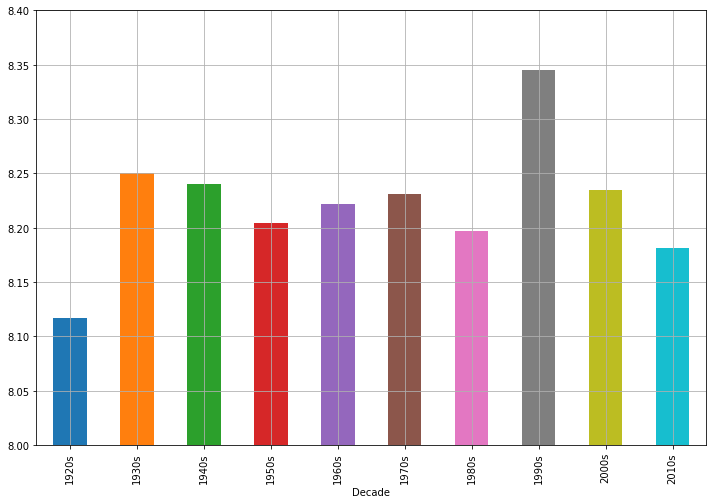

In [34]:
df['IMDb Rating'].groupby(df['Decade']).mean().plot.bar(figsize = (12, 8), grid = True, ylim = (8, 8.4))